In [119]:
year = '2006'

In [120]:
import json
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=[16,16])

department_color_mapping = {
    'Product Management': '#b5a265', # Dark brown
    'Sales': '#d43a2f', # Red
    'None': '#b5abaa', # Gray
    'G&A': '#150782', # Dark blue
    'Finance': '#17cf0a', # Green
    'Support and Operations': '#faf619', # Yellow
    'Marketing': '#ffb700', # Orange
    'Technology': '#07deed', # Light blue
    'People': '#e3d698' # Beige (light brown)
}

location_color_mapping = {
    'Singapore': '#b5a265', # Dark brown
    'Columbus': '#d43a2f', # Red
    'Seattle': '#b5abaa', # Gray
    'Shanghai': '#150782', # Dark blue
    'New York': '#17cf0a', # Green
    'London': '#faf619', # Yellow
    'Santa Barbara': '#ffb700', # Orange
    'Cape Town': '#07deed', # Light blue
    'Remote': '#e3d698', # Beige (light brown)
    'Sydney': '#bf08fc' # Purple
}


location_nodes = {'Singapore': [],
 'Columbus': [],
 'Seattle': [],
 'Shanghai': [],
 'New York': [],
 'London': [],
 'Santa Barbara': [],
 'Cape Town': [],
 'Remote': [],
 'Sydney': []}


location_mapping = {'US-OH-Columbus': 'Columbus',
 'US-NY-New York': 'New York',
 'US-CA-Remote (San Francisco)': 'Remote',
 'AU-Sydney': 'Sydney',
 'ZA-Cape Town': 'Cape Town',
 'US-TN-Remote (Santa Barbara)': 'Remote',
 'US-NY (Remote) UK': 'Remote',
 'US-WA-Seattle': 'Seattle',
 'EU-Poland': 'Remote',
 'US-CA-San Francisco': 'Remote',
 'US-NC-Remote (New York)': 'Remote',
 'US-CA-Remote (Santa Barbara)': 'Remote',
 'SG-Singapore': 'Singapore',
 'US-TX-Remote (Seattle)': 'Remote',
 '0. Advisor - US': 'Remote',
 'US-OH-Remote (Columbus)': 'Remote',
 'US-AZ-Remote (New York)': 'Remote',
 'US-AR-Remote (Columbus)': 'Remote',
 'NO-Oslo': 'Remote',
 'US-CO-Remote (New York)': 'Remote',
 'US-CA-Remote (Seattle)': 'Remote',
 'CN-Shanghai': 'Shanghai',
 'US-AZ-Remote (Seattle)': 'Remote',
 'US-CT-Remote (New York)': 'Remote',
 '0.Contractor': 'Remote',
 'GB-London': 'London',
 'US-CA-Santa Barbara': 'Santa Barbara',
 'Nepal (US-WA-Seattle': 'Seattle',
 'US-HI-Remote (Santa Barbara)': 'Remote',
#  'New York': 'New York',
#  'Cape Town': 'Cape Town',
#  'Santa Barbara': 'Santa Barbara',
#  'Remote': 'Remote',
 }

department_nodes = {'Product Management': [],
 'Sales': [],
 'None': [],
 'G&A': [],
 'Finance': [],
 'Support and Operations': [],
 'Marketing': [],
 'Technology': [],
 'People': []}

department_edges = {'Product Management': [],
 'Sales': [],
 'None': [],
 'G&A': [],
 'Finance': [],
 'Support and Operations': [],
 'Marketing': [],
 'Technology': [],
 'People': []}

location_nodes = {'Singapore': [],
 'Columbus': [],
 'Seattle': [],
 'Shanghai': [],
 'New York': [],
 'London': [],
 'Santa Barbara': [],
 'Cape Town': [],
 'Remote': [],
 'Sydney': []}

location_edges = {'Singapore': [],
 'Columbus': [],
 'Seattle': [],
 'Shanghai': [],
 'New York': [],
 'London': [],
 'Santa Barbara': [],
 'Cape Town': [],
 'Remote': [],
 'Sydney': []}



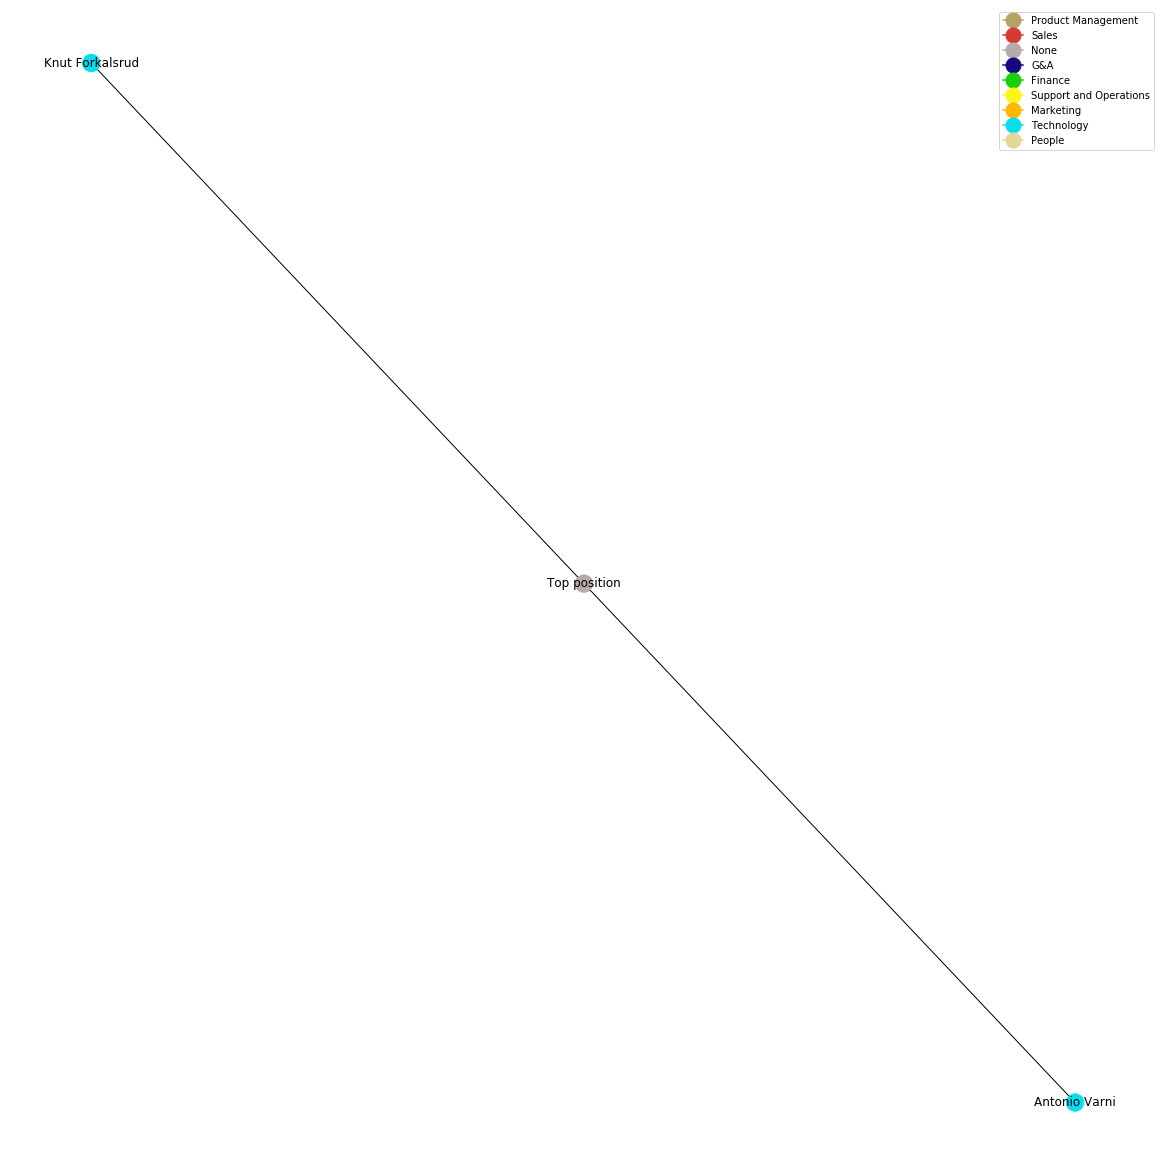

In [121]:
date = datetime.strptime('{}-12-31'.format(year), '%Y-%m-%d')

G = nx.Graph(k=0.8,iterations=50)
# G=nx.cubical_graph()
pos=nx.planar_layout(G)

job_titles = []
locations = []
department_names = []
edge_list = []
names = []

with open('../../data/raw/data.json') as json_file:
    data = json.load(json_file)
    G.add_node("Top position")
    for person1 in data['directReports']:
        if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d'):
            job_titles.append(person1['jobTitle'])
            locations.append(location_mapping[person1['location']])
            department_names.append(str(person1['departmentName']))
            G.add_node(person1['name'])
            department_nodes[str(person1['departmentName'])].append(person1['name'])
            location_nodes[location_mapping[person1['location']]].append(person1['name'])
            G.add_edge(person1['name'], "Top position")
            department_edges[str(person1['departmentName'])].append((person1['name'], "Top position"))
            location_edges[location_mapping[person1['location']]].append((person1['name'], "Top position"))
            person1_name = person1['name']
        else:
            person1_name = "Top position"
        names.append(person1_name)
        for person2 in person1['directReports']:
            if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d'):
                job_titles.append(person2['jobTitle'])
                locations.append(location_mapping[person2['location']])
                department_names.append(str(person2['departmentName']))
                G.add_node(person2['name'])
                department_nodes[str(person2['departmentName'])].append(person2['name'])
                location_nodes[location_mapping[person2['location']]].append(person2['name'])
                G.add_edge(person2['name'], person1_name)
                department_edges[str(person2['departmentName'])].append((person2['name'], person1_name))
                location_edges[location_mapping[person2['location']]].append((person2['name'], person1_name))
                person2_name = person2['name']
            else:
                person2_name = person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
            names.append(person2_name)
            for person3 in person2['directReports']:
                if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d'):
                    job_titles.append(person3['jobTitle'])
                    locations.append(location_mapping[person3['location']])
                    department_names.append(str(person3['departmentName']))
                    G.add_node(person3['name'])
                    department_nodes[str(person3['departmentName'])].append(person3['name'])
                    location_nodes[location_mapping[person3['location']]].append(person3['name'])
                    G.add_edge(person3['name'], person2_name)
                    department_edges[str(person3['departmentName'])].append((person3['name'], person2_name))
                    location_edges[location_mapping[person3['location']]].append((person3['name'], person2_name))
                    person3_name = person3['name']
                else:
                    person3_name = person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                names.append(person3_name)
                for person4 in person3['directReports']:
                    if date > datetime.strptime(person4['hireDate'], '%Y-%m-%d'):
                        job_titles.append(person4['jobTitle'])
                        locations.append(location_mapping[person4['location']])
                        department_names.append(str(person4['departmentName']))
                        G.add_node(person4['name'])
                        department_nodes[str(person4['departmentName'])].append(person4['name'])
                        location_nodes[location_mapping[person4['location']]].append(person4['name'])
                        G.add_edge(person4['name'], person3_name)
                        department_edges[str(person4['departmentName'])].append((person4['name'], person3_name))
                        location_edges[location_mapping[person4['location']]].append((person4['name'], person3_name))
                        person4_name = person4['name']
                    else:
                        person4_name = person3['name'] if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d') else person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                    names.append(person4_name)
                    for person5 in person4['directReports']:
                        if date > datetime.strptime(person5['hireDate'], '%Y-%m-%d'):
                            job_titles.append(person5['jobTitle'])
                            locations.append(location_mapping[person5['location']])
                            department_names.append(str(person5['departmentName']))
                            G.add_node(person5['name'])
                            department_nodes[str(person5['departmentName'])].append((person5['name']))
                            location_nodes[location_mapping[person5['location']]].append(person5['name'])
                            G.add_edge(person5['name'], person4_name)
                            department_edges[str(person5['departmentName'])].append((person5['name'], person4_name))
                            location_edges[location_mapping[person5['location']]].append((person5['name'], person4_name))
                            person5_name = person5['name']
                        else:
                            person5_name = person4['name'] if date > datetime.strptime(person4['hireDate'], '%Y-%m-%d') else person3['name'] if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d') else person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                        names.append(person5_name)


# Color by department
for department in department_nodes.keys():
    for person_name in department_nodes[department]:
        G.nodes[person_name]['color'] = department_color_mapping[department]

G.nodes['Top position']['color'] = '#b5abaa'
        
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=colors)

from matplotlib.lines import Line2D
legend_elements = [
                   Line2D([0], [0], marker='o', color='#b5a265', label='Product Management',
                          markerfacecolor='#b5a265', markersize=15),
                   Line2D([0], [0], marker='o', color='#d43a2f', label='Sales',
                          markerfacecolor='#d43a2f', markersize=15),
                   Line2D([0], [0], marker='o', color='#b5abaa', label='None',
                          markerfacecolor='#b5abaa', markersize=15),
                   Line2D([0], [0], marker='o', color='#150782', label='G&A',
                          markerfacecolor='#150782', markersize=15),
                   Line2D([0], [0], marker='o', color='#17cf0a', label='Finance',
                          markerfacecolor='#17cf0a', markersize=15),
                   Line2D([0], [0], marker='o', color='#faf619', label='Support and Operations',
                          markerfacecolor='#faf619', markersize=15),
                   Line2D([0], [0], marker='o', color='#ffb700', label='Marketing',
                          markerfacecolor='#ffb700', markersize=15),
                   Line2D([0], [0], marker='o', color='#07deed', label='Technology',
                          markerfacecolor='#07deed', markersize=15),
                   Line2D([0], [0], marker='o', color='#e3d698', label='People',
                          markerfacecolor='#e3d698', markersize=15),    
                   ]

plt.legend(handles=legend_elements, loc='fit')



plt.savefig('department_graph_{}.png'.format(year))


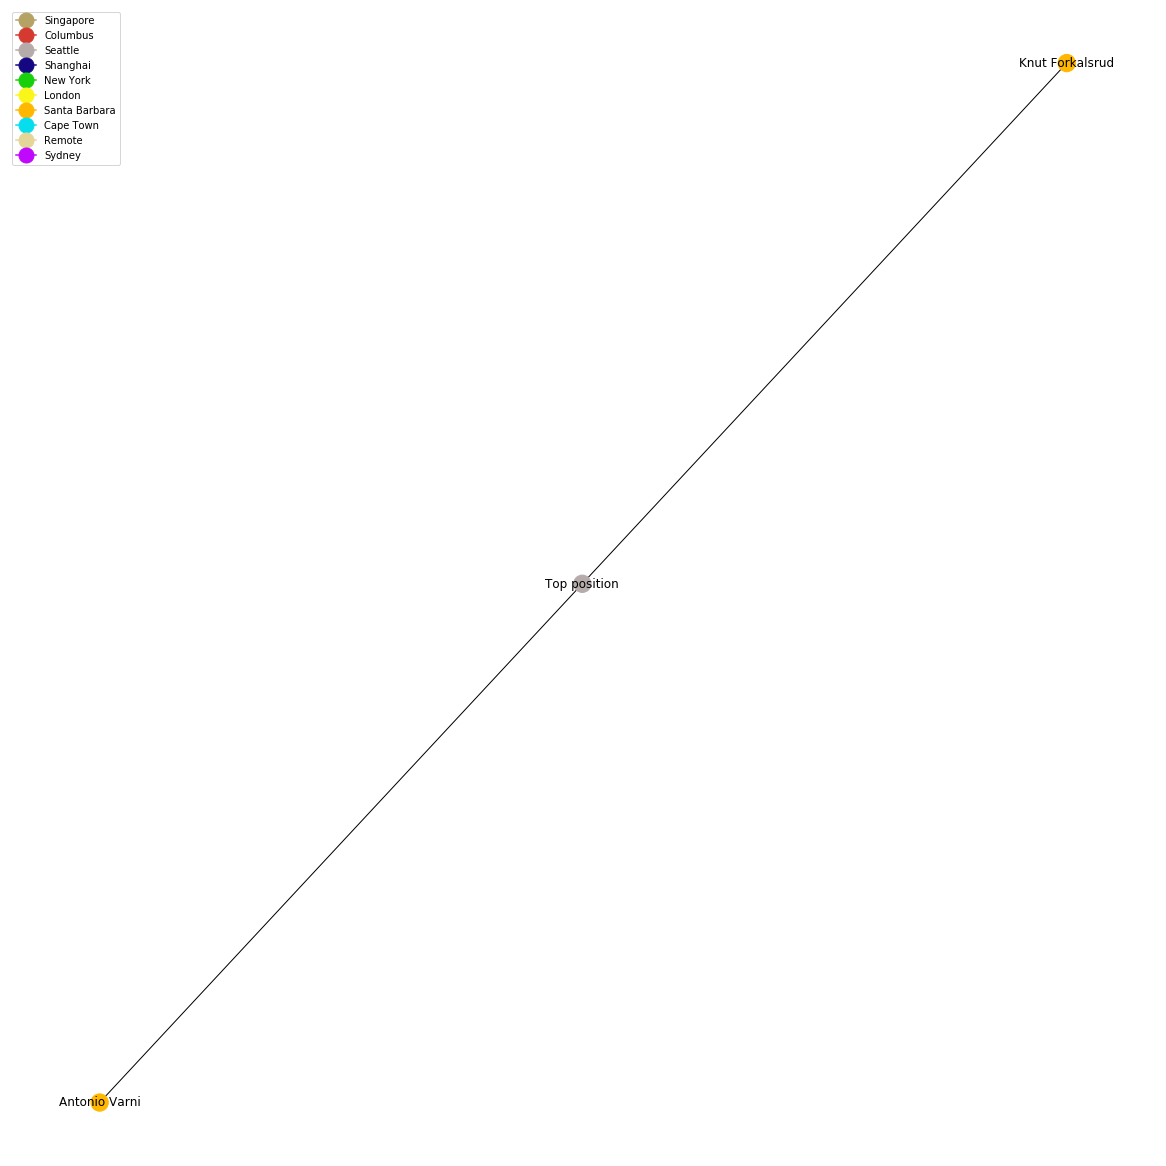

In [122]:
date = datetime.strptime('{}-12-31'.format(year), '%Y-%m-%d')

G = nx.Graph(k=0.8,iterations=50)
# G=nx.cubical_graph()
pos=nx.planar_layout(G)

job_titles = []
locations = []
department_names = []
edge_list = []
names = []

with open('../../data/raw/data.json') as json_file:
    data = json.load(json_file)
    G.add_node("Top position")
    for person1 in data['directReports']:
        if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d'):
            job_titles.append(person1['jobTitle'])
            locations.append(location_mapping[person1['location']])
            department_names.append(str(person1['departmentName']))
            G.add_node(person1['name'])
            department_nodes[str(person1['departmentName'])].append(person1['name'])
            location_nodes[location_mapping[person1['location']]].append(person1['name'])
            G.add_edge(person1['name'], "Top position")
            department_edges[str(person1['departmentName'])].append((person1['name'], "Top position"))
            location_edges[location_mapping[person1['location']]].append((person1['name'], "Top position"))
            person1_name = person1['name']
        else:
            person1_name = "Top position"
        names.append(person1_name)
        for person2 in person1['directReports']:
            if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d'):
                job_titles.append(person2['jobTitle'])
                locations.append(location_mapping[person2['location']])
                department_names.append(str(person2['departmentName']))
                G.add_node(person2['name'])
                department_nodes[str(person2['departmentName'])].append(person2['name'])
                location_nodes[location_mapping[person2['location']]].append(person2['name'])
                G.add_edge(person2['name'], person1_name)
                department_edges[str(person2['departmentName'])].append((person2['name'], person1_name))
                location_edges[location_mapping[person2['location']]].append((person2['name'], person1_name))
                person2_name = person2['name']
            else:
                person2_name = person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
            names.append(person2_name)
            for person3 in person2['directReports']:
                if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d'):
                    job_titles.append(person3['jobTitle'])
                    locations.append(location_mapping[person3['location']])
                    department_names.append(str(person3['departmentName']))
                    G.add_node(person3['name'])
                    department_nodes[str(person3['departmentName'])].append(person3['name'])
                    location_nodes[location_mapping[person3['location']]].append(person3['name'])
                    G.add_edge(person3['name'], person2_name)
                    department_edges[str(person3['departmentName'])].append((person3['name'], person2_name))
                    location_edges[location_mapping[person3['location']]].append((person3['name'], person2_name))
                    person3_name = person3['name']
                else:
                    person3_name = person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                names.append(person3_name)
                for person4 in person3['directReports']:
                    if date > datetime.strptime(person4['hireDate'], '%Y-%m-%d'):
                        job_titles.append(person4['jobTitle'])
                        locations.append(location_mapping[person4['location']])
                        department_names.append(str(person4['departmentName']))
                        G.add_node(person4['name'])
                        department_nodes[str(person4['departmentName'])].append(person4['name'])
                        location_nodes[location_mapping[person4['location']]].append(person4['name'])
                        G.add_edge(person4['name'], person3_name)
                        department_edges[str(person4['departmentName'])].append((person4['name'], person3_name))
                        location_edges[location_mapping[person4['location']]].append((person4['name'], person3_name))
                        person4_name = person4['name']
                    else:
                        person4_name = person3['name'] if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d') else person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                    names.append(person4_name)
                    for person5 in person4['directReports']:
                        if date > datetime.strptime(person5['hireDate'], '%Y-%m-%d'):
                            job_titles.append(person5['jobTitle'])
                            locations.append(location_mapping[person5['location']])
                            department_names.append(str(person5['departmentName']))
                            G.add_node(person5['name'])
                            department_nodes[str(person5['departmentName'])].append((person5['name']))
                            location_nodes[location_mapping[person5['location']]].append(person5['name'])
                            G.add_edge(person5['name'], person4_name)
                            department_edges[str(person5['departmentName'])].append((person5['name'], person4_name))
                            location_edges[location_mapping[person5['location']]].append((person5['name'], person4_name))
                            person5_name = person5['name']
                        else:
                            person5_name = person4['name'] if date > datetime.strptime(person4['hireDate'], '%Y-%m-%d') else person3['name'] if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d') else person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                        names.append(person5_name)

# Color by location
for location in location_nodes.keys():
    for person_name in location_nodes[location]:
        G.nodes[person_name]['color'] = location_color_mapping[location]
G.nodes['Top position']['color'] = '#b5abaa'
        
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=colors)

from matplotlib.lines import Line2D

legend_elements = [
                   Line2D([0], [0], marker='o', color='#b5a265', label='Singapore',
                          markerfacecolor='#b5a265', markersize=15),
                   Line2D([0], [0], marker='o', color='#d43a2f', label='Columbus',
                          markerfacecolor='#d43a2f', markersize=15),
                   Line2D([0], [0], marker='o', color='#b5abaa', label='Seattle',
                          markerfacecolor='#b5abaa', markersize=15),
                   Line2D([0], [0], marker='o', color='#150782', label='Shanghai',
                          markerfacecolor='#150782', markersize=15),
                   Line2D([0], [0], marker='o', color='#17cf0a', label='New York',
                          markerfacecolor='#17cf0a', markersize=15),
                   Line2D([0], [0], marker='o', color='#faf619', label='London',
                          markerfacecolor='#faf619', markersize=15),
                   Line2D([0], [0], marker='o', color='#ffb700', label='Santa Barbara',
                          markerfacecolor='#ffb700', markersize=15),
                   Line2D([0], [0], marker='o', color='#07deed', label='Cape Town',
                          markerfacecolor='#07deed', markersize=15),
                   Line2D([0], [0], marker='o', color='#e3d698', label='Remote',
                          markerfacecolor='#e3d698', markersize=15),    
                   Line2D([0], [0], marker='o', color='#bf08fc', label='Sydney',
                          markerfacecolor='#bf08fc', markersize=15),        
                   ]
plt.legend(handles=legend_elements, loc='fit')


plt.savefig('location_graph_{}.png'.format(year))
